<a href="https://colab.research.google.com/github/santiagoruiz-udea/News_classification/blob/main/Modelos_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importar librerias

In [1]:
import re
import time
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC



In [2]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [3]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk import word_tokenize

# 2. Cargar data

In [4]:
#categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
categories = [
    "comp.graphics",
    "misc.forsale",
    "rec.autos",
    "rec.motorcycles",
    "rec.sport.baseball",
    "sci.electronics",
    "sci.space",
    "talk.religion.misc",
    "talk.politics.misc",
    "alt.atheism",
    "comp.sys.ibm.pc.hardware",
    "rec.sport.hockey",
    "sci.crypt",
    "sci.med",
    "talk.politics.guns",
]
news = fetch_20newsgroups(subset="all", categories=categories,remove=('headers', 'footers', 'quotes'), shuffle=True, random_state=42)
target_names = news.target_names

print("Número de articulos: {}".format(len(news.data)))
print("Número de categorias: {}".format(len(news.target_names)))


Número de articulos: 13973
Número de categorias: 15


# 4.Preprocesado

In [5]:
def clean_text(news):

  df = pd.DataFrame(news.data, columns=['text'])
  df["categories"] = [news.target_names[i] for i in news.target]
  df["labels"] = [i for i in news.target]

  signos = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
  # Remove signo puntuacion 
  df["text"] = [re.sub(signos, ' ', sent) for sent in df["text"]]
  # Remove multiples whitspaces characters
  df["text"] = [re.sub('\s+', ' ', sent) for sent in df["text"]]
  # Remove whitspace star and end text
  df['text'] = df['text'].str.strip()
  # Remove Emails
  df["text"] = [re.sub('\S*@\S*\s?', '', sent) for sent in df["text"]]
  # Remove distracting single quotes
  df["text"] = [re.sub("\'", "", sent) for sent in df["text"]]
  # Remove any rows with empty fields
  df = df.replace('', np.NaN).dropna()
  # Drop duplicates
  df = df.drop_duplicates(subset='text')
  # Remove number
  df['text'] = [re.sub(r'\[[0-9]*\]', ' ', text) for text in df['text']]
  # lower
  df["text"] = [text.lower() for text in df["text"]]
  # Remove multiples whitspaces characters
  df["text"] = [re.sub('\s+', ' ', sent) for sent in df["text"]]
  return df

In [6]:
df = clean_text(news)
data = df["text"].values
target = df["labels"].values
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2)

In [7]:
def stemming_tokenizer(text):
    stemmer = PorterStemmer()
    return [stemmer.stem(w) for w in word_tokenize(text)]

In [8]:
#defining the function for lemmatization
def lemmatizer_tokenizer(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    return [wordnet_lemmatizer.lemmatize(w) for w in word_tokenize(text)]

In [9]:
TFIDFvectorizer = TfidfVectorizer(stop_words='english')
X_trainTF = TFIDFvectorizer.fit_transform(X_train)
Y_trainTF = Y_train

X_testTF = TFIDFvectorizer.transform(X_test)
Y_testTF = Y_test

#5.Clasificación

## 5.1. Logistic Regression

In [ ]:
LRclf = LogisticRegression()
LRclf.fit(X_trainTF.toarray(), Y_trainTF)

LogisticRegression()

In [ ]:
lrpred = LRclf.predict(X_trainTF.toarray())
train_score = accuracy_score(Y_trainTF, lrpred) * 100
print("Train accuracy score: {:.2f}%".format(train_score))

lrpred = LRclf.predict(X_testTF.toarray())
test_score = accuracy_score(Y_testTF, lrpred) * 100
print("Test accuracy score: {:.2f}%".format(test_score))


Train accuracy score: 94.84%
Test accuracy score: 80.08%


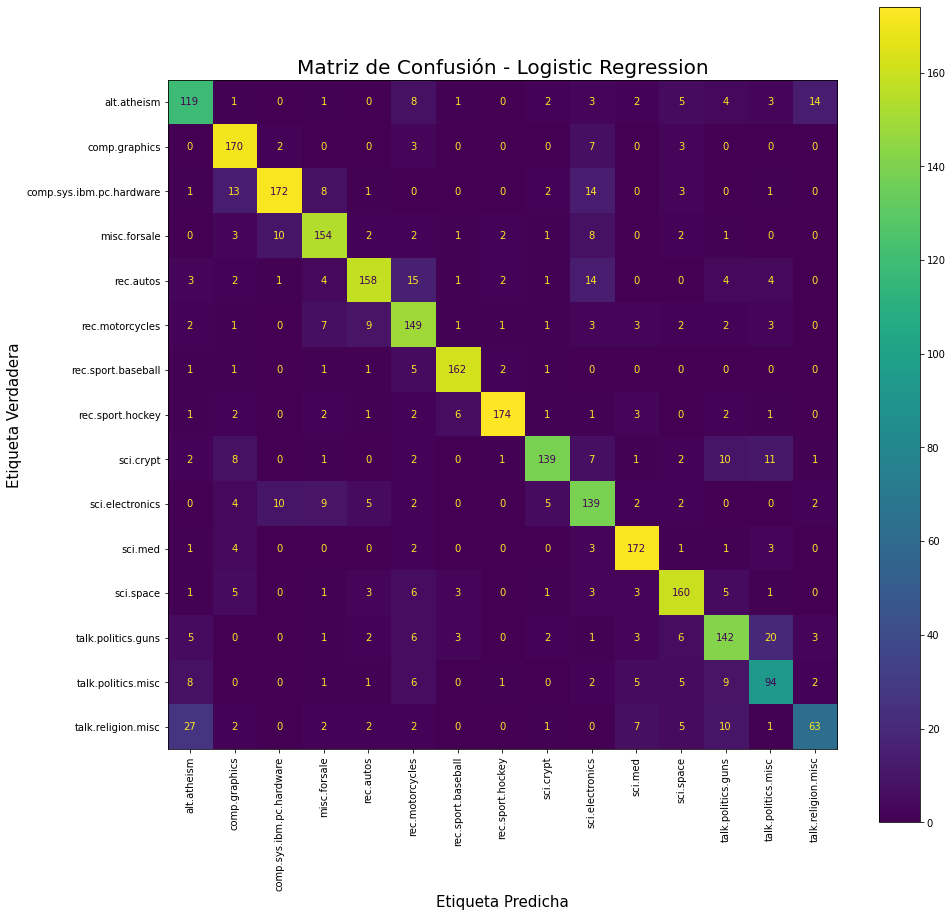

In [ ]:
cm = confusion_matrix(Y_testTF, lrpred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=target_names)

fig, ax = plt.subplots(figsize=(15, 15))
disp = disp.plot(xticks_rotation='vertical', ax=ax)
plt.title("Matriz de Confusión - Logistic Regression", fontsize=20)
plt.ylabel("Etiqueta Verdadera", fontsize=15)
plt.xlabel("Etiqueta Predicha", fontsize=15)

plt.show()

In [ ]:
# Metricas
target_names = target_names
print(classification_report(Y_testTF, lrpred, target_names=target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.70      0.73      0.71       163
           comp.graphics       0.79      0.92      0.85       185
comp.sys.ibm.pc.hardware       0.88      0.80      0.84       215
            misc.forsale       0.80      0.83      0.81       186
               rec.autos       0.85      0.76      0.80       209
         rec.motorcycles       0.71      0.81      0.76       184
      rec.sport.baseball       0.91      0.93      0.92       174
        rec.sport.hockey       0.95      0.89      0.92       196
               sci.crypt       0.89      0.75      0.81       185
         sci.electronics       0.68      0.77      0.72       180
                 sci.med       0.86      0.92      0.89       187
               sci.space       0.82      0.83      0.82       192
      talk.politics.guns       0.75      0.73      0.74       194
      talk.politics.misc       0.66      0.70      0.68       134
      tal

## 5.2. Naive Bayes - MultinomialNB

In [ ]:
NBclf = MultinomialNB(alpha=0.01)
NBclf.fit(X_trainTF.toarray(), Y_train)

MultinomialNB(alpha=0.01)

In [ ]:
NBpred = NBclf.predict(X_trainTF.toarray())
train_score = accuracy_score(Y_trainTF, NBpred)*100
print("Train accuracy score: {:.2f}%".format(train_score))

NBpred = NBclf.predict(X_testTF.toarray())
train_score = accuracy_score(Y_testTF, NBpred)*100
print("Test accuracy score: {:.2f}%".format(train_score))

Train accuracy score: 98.38%
Test accuracy score: 83.00%


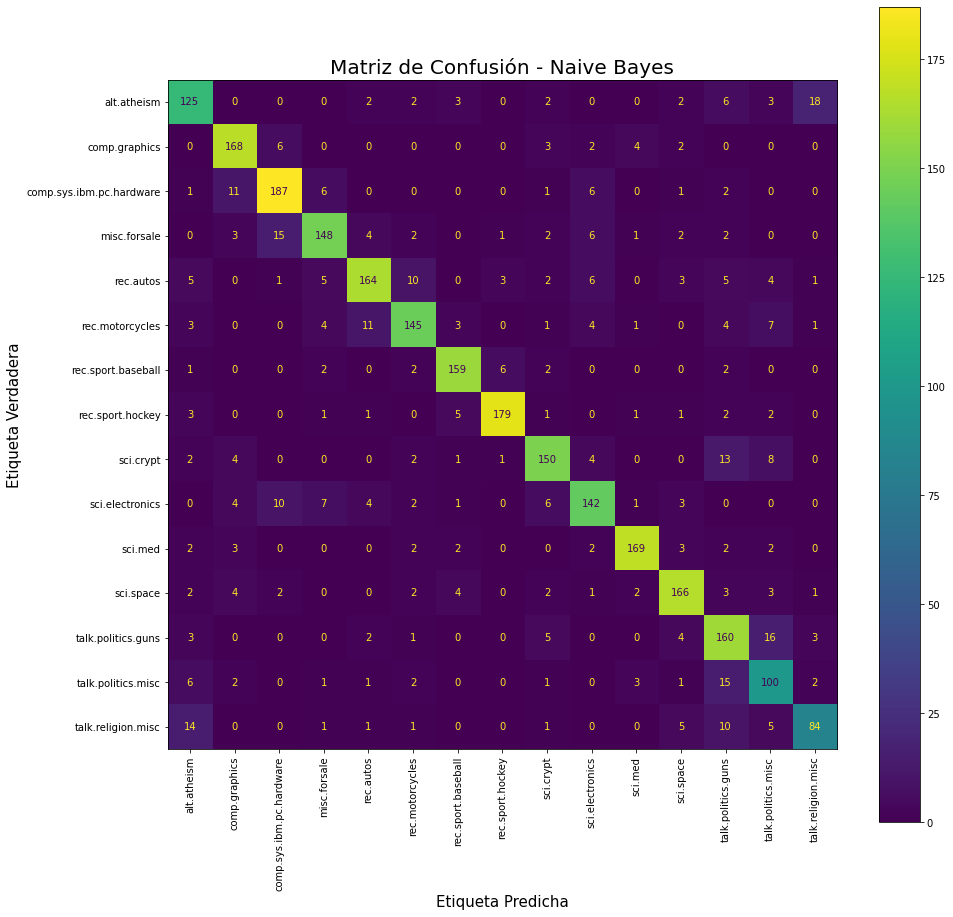

In [ ]:
target_names = target_names
cm = confusion_matrix(Y_testTF, NBpred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

fig, ax = plt.subplots(figsize=(15, 15))
disp = disp.plot(xticks_rotation='vertical', ax=ax)
plt.title("Matriz de Confusión - Naive Bayes", fontsize=20)
plt.ylabel("Etiqueta Verdadera", fontsize=15)
plt.xlabel("Etiqueta Predicha", fontsize=15)
plt.show()

In [ ]:
# Metricas
print(classification_report(Y_testTF, NBpred, target_names=target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.75      0.77      0.76       163
           comp.graphics       0.84      0.91      0.88       185
comp.sys.ibm.pc.hardware       0.85      0.87      0.86       215
            misc.forsale       0.85      0.80      0.82       186
               rec.autos       0.86      0.78      0.82       209
         rec.motorcycles       0.84      0.79      0.81       184
      rec.sport.baseball       0.89      0.91      0.90       174
        rec.sport.hockey       0.94      0.91      0.93       196
               sci.crypt       0.84      0.81      0.82       185
         sci.electronics       0.82      0.79      0.80       180
                 sci.med       0.93      0.90      0.92       187
               sci.space       0.86      0.86      0.86       192
      talk.politics.guns       0.71      0.82      0.76       194
      talk.politics.misc       0.67      0.75      0.70       134
      tal

## 5.3. Support vextor Machine

In [ ]:
SVMclf = LinearSVC()
SVMclf.fit(X_trainTF.toarray(), Y_train)

LinearSVC()

In [ ]:
import joblib
joblib.dump(SVMclf, 'LinearSVC.pkl')

['LinearSVC.pkl']

In [ ]:
SVMpred = SVMclf.predict(X_trainTF.toarray())
train_score = accuracy_score(Y_trainTF, SVMpred) * 100
print("Train accuracy score: {:.2f}%".format(train_score))

SVMpred = SVMclf.predict(X_testTF.toarray())
train_score = accuracy_score(Y_testTF, SVMpred) * 100
print("Test accuracy score: {:.2f}%".format(train_score))


Train accuracy score: 99.70%
Test accuracy score: 81.52%


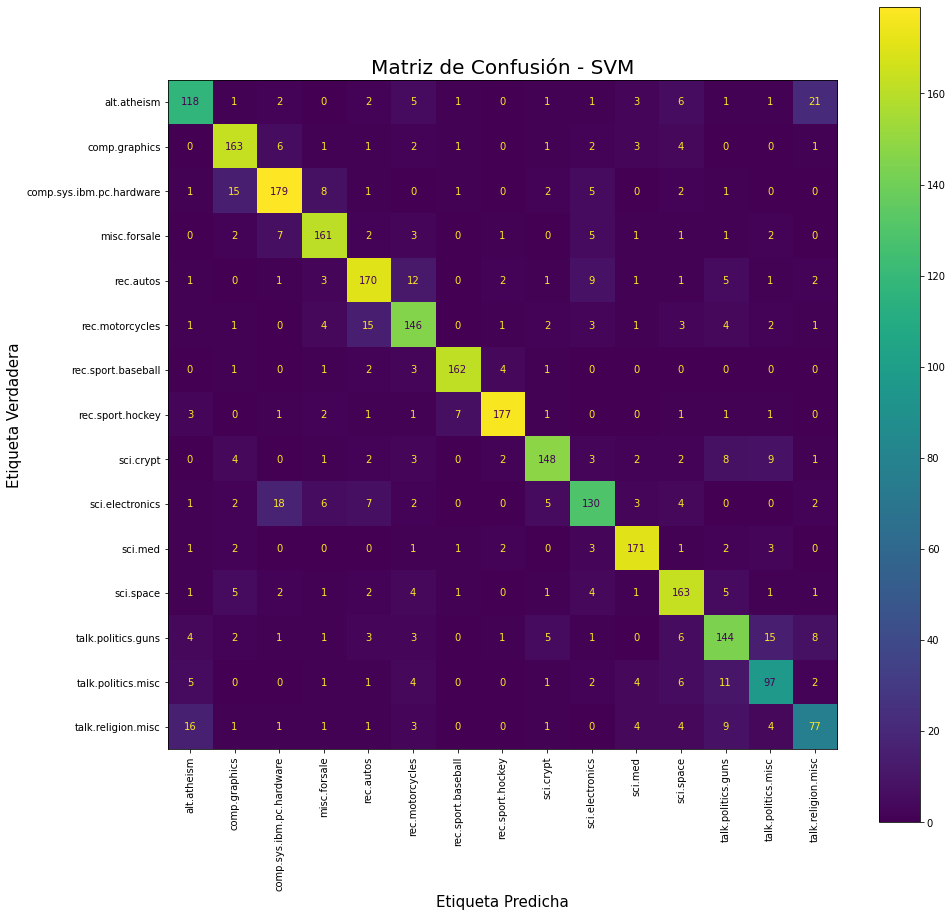

In [ ]:
cm = confusion_matrix(Y_testTF, SVMpred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

fig, ax = plt.subplots(figsize=(15, 15))
disp = disp.plot(xticks_rotation='vertical', ax=ax)
plt.title("Matriz de Confusión - SVM", fontsize=20)
plt.ylabel("Etiqueta Verdadera", fontsize=15)
plt.xlabel("Etiqueta Predicha", fontsize=15)
plt.show()

In [ ]:
# Metricas
print(classification_report(Y_testTF, SVMpred, target_names=target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.78      0.72      0.75       163
           comp.graphics       0.82      0.88      0.85       185
comp.sys.ibm.pc.hardware       0.82      0.83      0.83       215
            misc.forsale       0.84      0.87      0.85       186
               rec.autos       0.81      0.81      0.81       209
         rec.motorcycles       0.76      0.79      0.78       184
      rec.sport.baseball       0.93      0.93      0.93       174
        rec.sport.hockey       0.93      0.90      0.92       196
               sci.crypt       0.87      0.80      0.83       185
         sci.electronics       0.77      0.72      0.75       180
                 sci.med       0.88      0.91      0.90       187
               sci.space       0.80      0.85      0.82       192
      talk.politics.guns       0.75      0.74      0.75       194
      talk.politics.misc       0.71      0.72      0.72       134
      tal

#6. Clasificador con CNN

In [10]:
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds

In [11]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(X_train, target_vocab_size=2**18)

train_inputs = [tokenizer.encode(text) for text in X_train]
test_input = [tokenizer.encode(text) for text in X_test]

In [12]:
MAX_LEN_train = max([len(sentence) for sentence in train_inputs])
MAX_LEN_test = max([len(sentence) for sentence in test_input])

train_inputs = tf.keras.preprocessing.sequence.pad_sequences(train_inputs, value=0, padding="post", maxlen=MAX_LEN_train)
test_inputs = tf.keras.preprocessing.sequence.pad_sequences(test_input, value=0, padding="post", maxlen=MAX_LEN_test)

In [ ]:
class DCNN(tf.keras.Model):
    
    def __init__(self, vocab_size, emb_dim=128, nb_filters=50, FFN_units=512, nb_classes=2,
                 dropout_rate=0.1, training=False, name="dcnn"):
        super(DCNN, self).__init__(name=name)
        
        self.embedding = layers.Embedding(vocab_size, emb_dim)
        self.bigram = layers.Conv1D(filters=nb_filters, kernel_size=2, padding="valid", activation="relu")
        self.trigram = layers.Conv1D(filters=nb_filters, kernel_size=3, padding="valid", activation="relu")
        self.fourgram = layers.Conv1D(filters=nb_filters, kernel_size=4, padding="valid", activation="relu")
        self.pool = layers.GlobalMaxPool1D() # no training variable so we can
                                             # use the same layer for each
                                             # pooling step
        self.dense_1 = layers.Dense(units=FFN_units, activation="relu")
        self.dropout = layers.Dropout(rate=dropout_rate)
        if nb_classes == 2:
            self.last_dense = layers.Dense(units=1, activation="sigmoid")
        else:
            self.last_dense = layers.Dense(units=nb_classes, activation="softmax")
    
    def call(self, inputs, training):
        x = self.embedding(inputs)
        x_1 = self.bigram(x)
        x_1 = self.pool(x_1)
        x_2 = self.trigram(x)
        x_2 = self.pool(x_2)
        x_3 = self.fourgram(x)
        x_3 = self.pool(x_3)
        
        merged = tf.concat([x_1, x_2, x_3], axis=-1) # (batch_size, 3 * nb_filters)
        merged = self.dense_1(merged)
        merged = self.dropout(merged, training)
        output = self.last_dense(merged)
        
        return output

In [ ]:
VOCAB_SIZE = tokenizer.vocab_size

EMB_DIM = 200
NB_FILTERS = 100
FFN_UNITS = 256
NB_CLASSES = len(set(Y_train))

DROPOUT_RATE = 0.2

BATCH_SIZE = 32
NB_EPOCHS = 5

Dcnn = DCNN(vocab_size=VOCAB_SIZE, emb_dim=EMB_DIM, nb_filters=NB_FILTERS,
            FFN_units=FFN_UNITS, nb_classes=NB_CLASSES,
            dropout_rate=DROPOUT_RATE)

In [ ]:
Dcnn.compile(loss="sparse_categorical_crossentropy",
                 optimizer="adam",
                 metrics=["sparse_categorical_accuracy"])

In [ ]:
checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/PDI2/clf3"

ckpt = tf.train.Checkpoint(Dcnn=Dcnn)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print("Latest checkpoint restored!!")

In [ ]:
history = Dcnn.fit(train_inputs, Y_train, validation_split=0.2, batch_size=BATCH_SIZE, epochs=NB_EPOCHS)
ckpt_manager.save()

Epoch 1/5
271/271 [==============================] - 182s 624ms/step - loss: 2.1335 - sparse_categorical_accuracy: 0.3210 - val_loss: 1.3090 - val_sparse_categorical_accuracy: 0.5995
Epoch 2/5
271/271 [==============================] - 165s 608ms/step - loss: 0.8029 - sparse_categorical_accuracy: 0.7607 - val_loss: 0.9521 - val_sparse_categorical_accuracy: 0.7122
Epoch 3/5
271/271 [==============================] - 165s 609ms/step - loss: 0.2209 - sparse_categorical_accuracy: 0.9437 - val_loss: 0.9739 - val_sparse_categorical_accuracy: 0.7164
Epoch 4/5
271/271 [==============================] - 165s 609ms/step - loss: 0.0382 - sparse_categorical_accuracy: 0.9947 - val_loss: 1.0330 - val_sparse_categorical_accuracy: 0.7339
Epoch 5/5
271/271 [==============================] - 164s 606ms/step - loss: 0.0124 - sparse_categorical_accuracy: 0.9986 - val_loss: 1.1145 - val_sparse_categorical_accuracy: 0.7219


'/content/drive/MyDrive/Colab Notebooks/PDI2/clf3/ckpt-1'

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


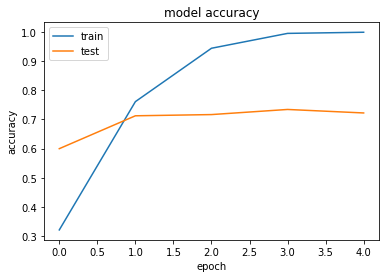

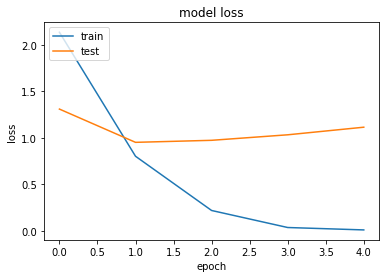

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
results = Dcnn.evaluate(test_inputs, Y_test, batch_size=BATCH_SIZE)
print(results)

85/85 [==============================] - 17s 176ms/step - loss: 1.0345 - sparse_categorical_accuracy: 0.7387
[1.034510612487793, 0.7387287616729736]


In [ ]:
example_result = Dcnn.predict(test_inputs)
label_predict = []
for i in range(0,example_result.shape[0]):
  label_predict.append(example_result[i].argmax())

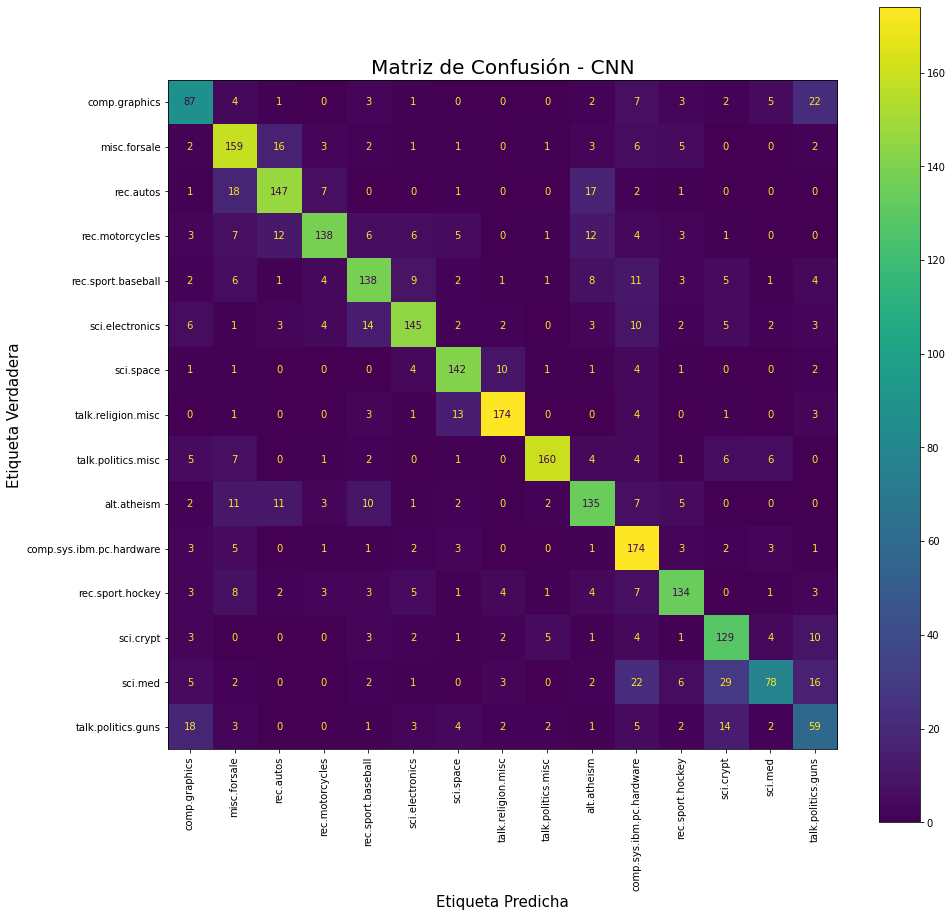

In [ ]:
cm = confusion_matrix(Y_test,label_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=categories)
fig, ax = plt.subplots(figsize=(15, 15))
disp = disp.plot(xticks_rotation='vertical', ax=ax)
plt.title("Matriz de Confusión - CNN", fontsize=20)
plt.ylabel("Etiqueta Verdadera", fontsize=15)
plt.xlabel("Etiqueta Predicha", fontsize=15)

plt.show()

In [ ]:
print(classification_report(Y_test, label_predict, target_names=target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.62      0.64      0.63       137
           comp.graphics       0.68      0.79      0.73       201
comp.sys.ibm.pc.hardware       0.76      0.76      0.76       194
            misc.forsale       0.84      0.70      0.76       198
               rec.autos       0.73      0.70      0.72       196
         rec.motorcycles       0.80      0.72      0.76       202
      rec.sport.baseball       0.80      0.85      0.82       167
        rec.sport.hockey       0.88      0.87      0.87       200
               sci.crypt       0.92      0.81      0.86       197
         sci.electronics       0.70      0.71      0.70       189
                 sci.med       0.64      0.87      0.74       199
               sci.space       0.79      0.75      0.77       179
      talk.politics.guns       0.66      0.78      0.72       165
      talk.politics.misc       0.76      0.47      0.58       166
      tal

In [ ]:
model = Sequential()
 # Capa completamente conectada
model.add(Dense(512, input_shape=(len(vocab)+1,), activation='relu'))
 # DropOut layer
model.add(Dropout(0.5))
 # Capa completamente conectada + clasificador
model.add(Dense(num_labels,activation='softmax'))
 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])